# Aufgabe 1: Business Understanding

## Ziele:

1.   Vorhersage des Verkaufspreises
2.   Was muss renoviert werden um den Verkaufspreis der Immobilie zu maximieren?
3.   Mit welchem Budget sollte in welches Gebiet investiert werden?
4.   Welche Hausattribute haben einen ausschlaggebenden Einfluss auf den Preis?
3.   Welches ist der beste Verkaufsmonat einer Immobilie?

-----------------------
Investoren erwarten einen möglichst hohen Gewinn für ihr Geld, welches sie in die Immobilien investieren.  
Sinnvolle Ziele sind daher die oben genannten fünf Ziele.

Der Verkaufspreis eines Hauses soll vorhergesagt werden können, außerdem soll herausgefunden werden welche Immobilien-Eigenschaften besonders häufig unter den Verkäufen vertreten waren.  

Weiterhin soll durch Renovierungsvorschläge das Geld effizienter eingesetzt werden können.  

Um Investoren mit einem begrenzten Budget das Investieren zu erleichtern sollte herausgefunden werden in welchem Bezirk man mit welchem Budget ein Haus kaufen kann.  

Zudem soll analysiert werden, welche Hausattribute und Verkaufsfaktoren welche Auswirkung auf den Preis haben.  

Außerdem könnte es Unterschiede vom Verkaufspreis zum Verkaufsmonat geben. Um den Gewinn zu maximieren ist es hier sinnvoll den Monat zu ermitteln, zu dem günstig eingekauft und teuer verkauft werden kann. Hierdurch können unsere Kunden/Investoren ihren potentiellen Gewinn maximieren.

# Aufgabe 2: Data Exploration und Analyse

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math

In [2]:
# Datensatz einlesen
dataset = pd.read_csv('./DatenAusgegeben1.0.csv', delimiter=';', encoding = 'cp852')
dataset

,Grundstück in qm,Grundstücksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,...,Schlafzimmer,Küchen,Küchenqualitt,Rume,Garage Typ,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,...,6,2,3,10,Anbau,2,NaN,8,2136,156500
1,1326,Reg,Nein,North East,RL,Norm,1Fam,5,2133,2133,...,3,1,4,7,Anbau,3,NaN,1,2137,350000
2,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,...,3,1,4,5,Freistehend,1,NaN,6,2140,137900
3,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,...,3,1,4,8,Anbau,2,NaN,4,2136,184000
4,697,Reg,Nein,Miller,RL,Norm,1Fam,5,2129,2129,...,3,1,4,7,Anbau,2,NaN,6,2140,189000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1272,IR1,Nein,North East,RL,Norm,1Fam,5,2133,2134,...,3,1,5,10,Eingebaut,3,NaN,3,2138,412500
1996,941,IR1,Nein,Miller,RL,Norm,1Fam,5,2134,2134,...,3,1,4,7,Anbau,2,NaN,7,2139,195500
1997,1093,Reg,Nein,Grand Park,RL,Norm,1Fam,7,2040,2130,...,2,1,3,6,Freistehend,1,NaN,5,2137,112000
1998,1228,IR1,Nein,North East,RL,Norm,1Fam,5,2134,2134,...,3,1,4,9,Eingebaut,3,NaN,2,2136,279000


Import seaborn und pyplot

In [3]:
columns = ['Grundstück in qm', 'Zustand', 'Gebaut',
           'Renoviert', 'Zustand Fassade', 'Kellerflche in qm',
           'Erster Stock in qm', 'Zweiter Stock in qm', 'Wohnflche in qm', 
           'Schlafzimmer', 'Küchen', 'Küchenqualitt', 'Rume', 'Garagenkapazitt',
           'Verkaufsmonat', 'Verkaufsjahr', 'Preis']

## Finden von Anomalien
Zuerst müssen Ausreißer im Datensatz gefunden werden. Hierfür eignen sich Boxplots sehr gut.

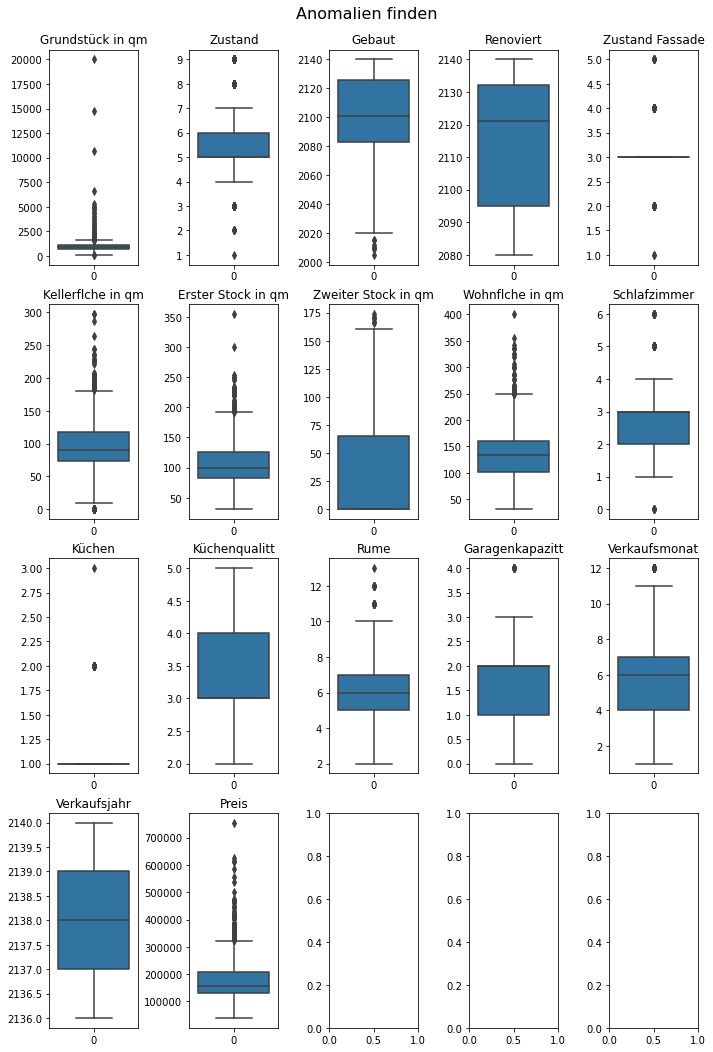

In [4]:
## Durch Subplots mehrere Plots auf einer Figure
fig, axes = plt.subplots(4, 5, figsize = (10, 15))
i = 0
plt.tight_layout(pad = 2)
fig.suptitle("Anomalien finden", fontsize = 16)
fig.subplots_adjust(top = 0.94)
for column in columns:
  chosenax = axes[math.floor(i / 5)][i % 5]
  chosenax.set_title(column)
  sb.boxplot(data = dataset[column], ax = chosenax)
  i = i + 1
plt.show()

### Erkenntnis
Bei dem obenstehenden Diagramm zeigt sich, dass sich in einigen Spalten durchaus starke Ausreißer finden.  
Hier ist als Beispiel die Grundstücksgröße, Wohnfläche und den Preis zu nennen. Diese Ausreißer sollten in der Data Preparation folglich bereinigt werden

## Untersuchung auf einen Zusammenhang zwischen Preis und Verkaufszeitpunkt
Um zu Untersuchen ob der Zeitpunkt einen Einfluss auf den Verkaufspreis besitzt, untersuchen wir zwei Boxplots die den Zusammenhang zwischen Verkaufszeitpunkt und Verkaufspreis darstellen sollen.

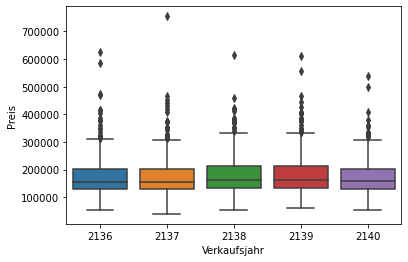

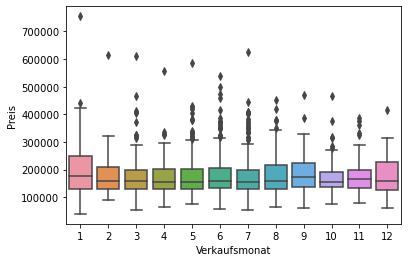

In [5]:
sb.boxplot(data = dataset[['Verkaufsjahr', 'Preis']], x = 'Verkaufsjahr', y = 'Preis')
plt.show()
sb.boxplot(data = dataset[['Verkaufsmonat', 'Preis']], x = 'Verkaufsmonat', y = 'Preis')
plt.show()

### Erkenntnis
Aus diesen zwei Diagrammen lässt sich kein Zusammenhang zwischen Zeitpunkt und Preis erkennen. Verkaufsjahr und Verkaufsmonat besitzen keinen Einfluss auf den Preis.

## Untersuchung des Datensatzes auf vernachlässigbare Hauseigenschaften (Spalten)

Da nicht-aussagekräftige Spalten nicht in unser Modell einfließen sollten, wird folgend der Datensatz auf vernachlässigbare bzw. nichtssagende Eigenschaften untersucht.

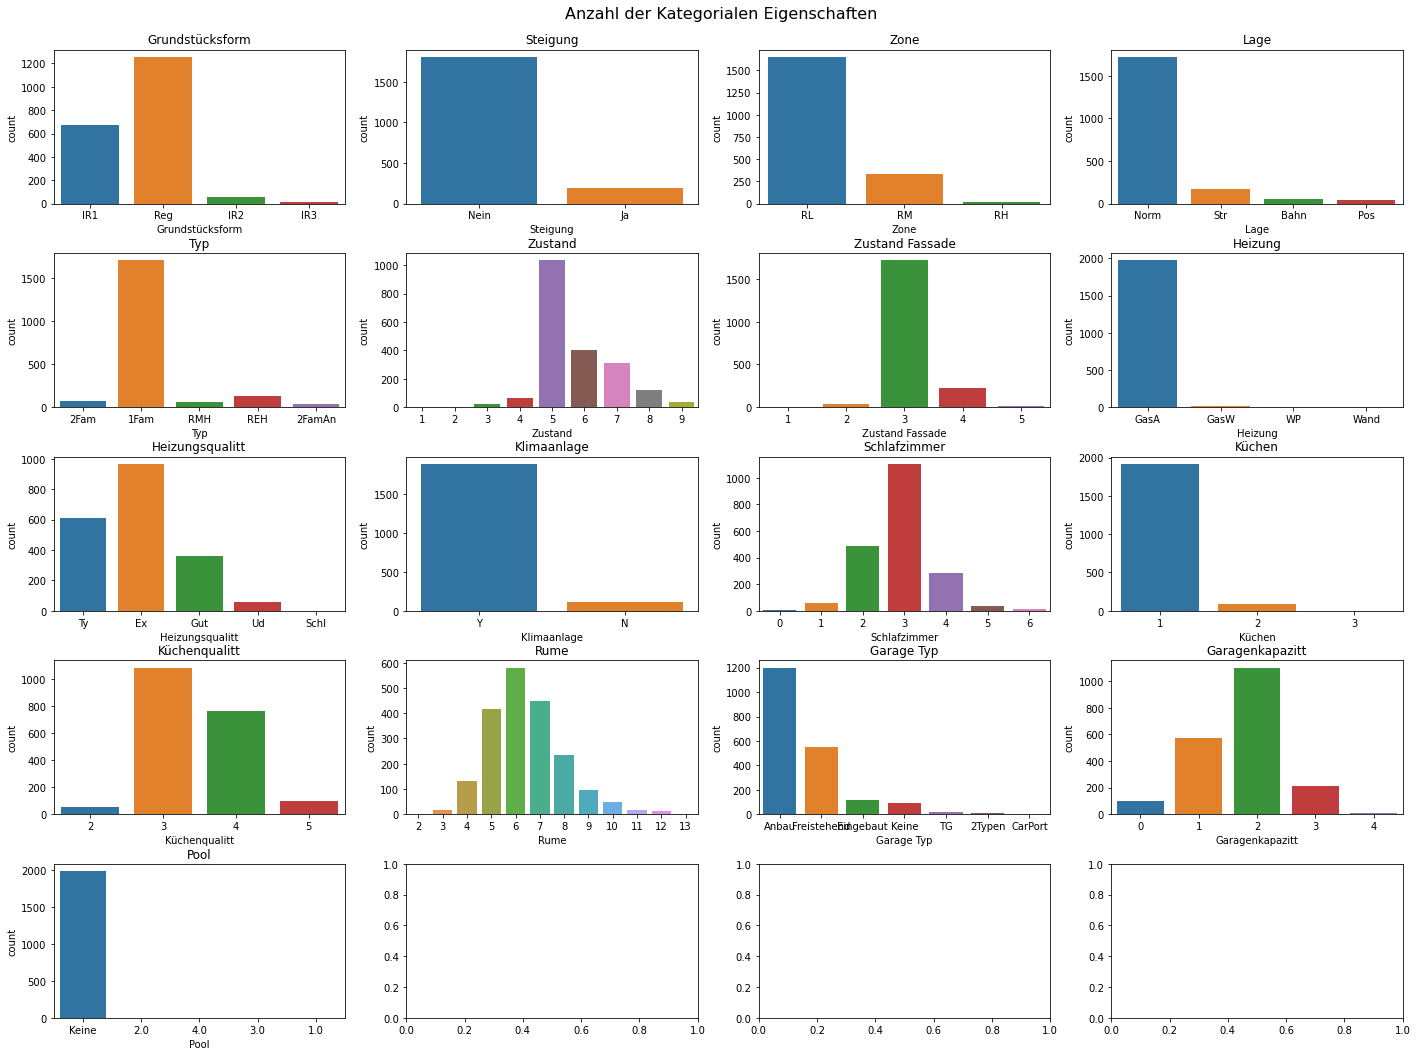

In [6]:
attribute_columns = ['Grundstücksform', 'Steigung', 'Zone', 'Lage',
'Typ', 'Zustand', 'Zustand Fassade', 'Heizung',
'Heizungsqualitt', 'Klimaanlage', 'Schlafzimmer', 'Küchen',
'Küchenqualitt', 'Rume', 'Garage Typ', 'Garagenkapazitt', 'Pool'] # Alle Spalten die Immobilieneigenschaften repräsentieren

data_no_nan = dataset[attribute_columns].fillna('Keine') # Füllt leere Zeilen (bspw. bei Pool und GaragenTyp) mit einem Standardwert.

column_amount = len(data_no_nan.columns)
fig, axes = plt.subplots(math.ceil(column_amount / 4), 4, figsize = (20, 15))

i = 0
plt.tight_layout(pad = 3)
fig.suptitle("Anzahl der Kategorialen Eigenschaften", fontsize = 16)
fig.subplots_adjust(top = 0.94)
for column in data_no_nan.columns:
  chosenax = axes[math.floor(i / 4)][i % 4]
  chosenax.set_title(column)
  sb.countplot(data = data_no_nan, x = column, ax = chosenax)
  i = i + 1
plt.show()


### Erkenntnis
Hier hat sich herausgestellt, dass einige Spalten nicht aussagekräftig genug sind, da die Spalten eine zu geringe Varianz besitzen.

Spalten mit sehr geringer Varianz:
- Pool
- Küchen(anzahl)
- Klimaanlage
- Heizung



## Korrelation zwischen Preis und Immmobilieneigenschaften
Um die Korrelation visualisieren zu können wird folgend eine einspaltige Heatmap genutzt.  
Aus dieser soll sich herauslesen lassen können welche Attribute ausschlaggebend für einen höheren, oder auch einen niedrigeren Preis sind.

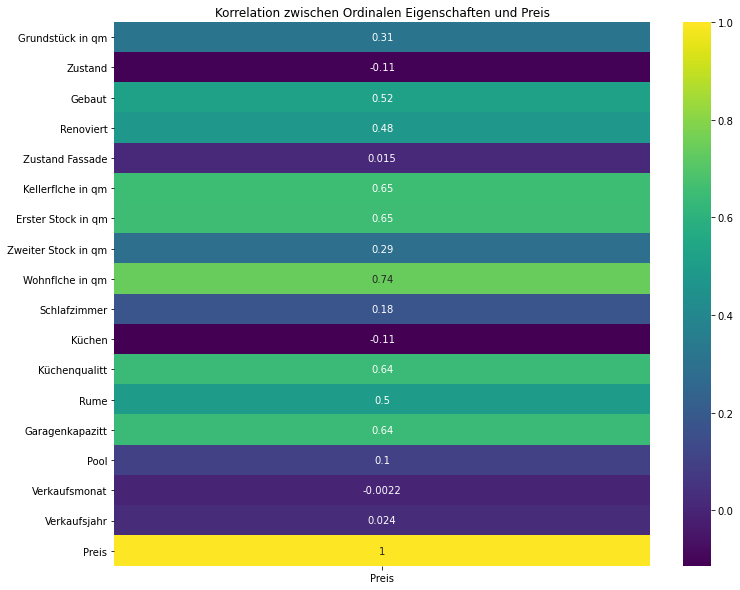

In [7]:
# Ordinale Daten
plt.figure(figsize = (12, 10))
sb.heatmap(data = dataset.fillna(0).corr()['Preis'].to_frame(), annot = True, cmap = 'viridis').set_title("Korrelation zwischen Ordinalen Eigenschaften und Preis")
plt.show()

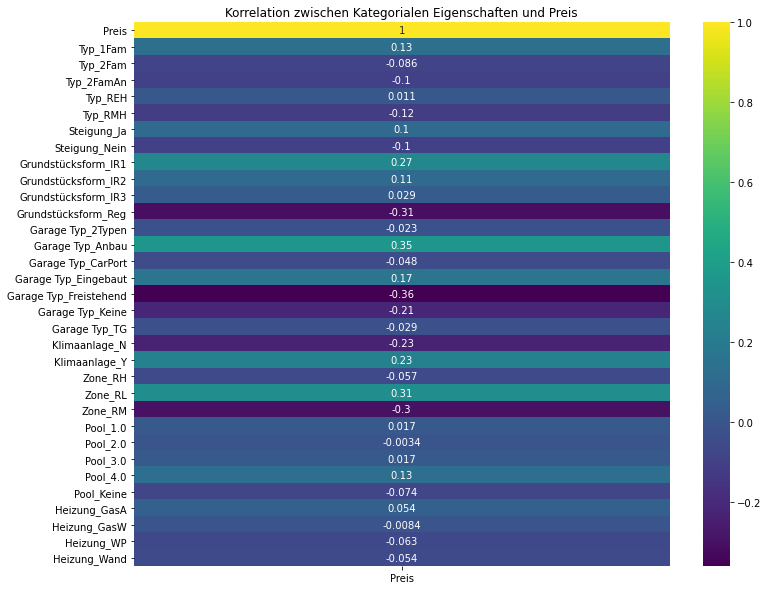

In [8]:
# Kategoriale Daten
encoded_kategorieeigenschaften = pd.get_dummies(dataset[['Typ', 'Steigung', 'Grundstücksform', 'Garage Typ', 'Klimaanlage', 'Zone', 'Pool', 'Heizung']].fillna('Keine'))

kategorie_preis = dataset[['Preis']].join(encoded_kategorieeigenschaften)
plt.figure(figsize = (12, 10))
sb.heatmap(data = kategorie_preis.corr()['Preis'].to_frame(), annot = True, cmap = 'viridis').set_title("Korrelation zwischen Kategorialen Eigenschaften und Preis")
plt.show()

### Erkenntnis
In einer Korrelation mit dem Preis stehende Eigenschaften sind:
- Grundstücksgröße
- Baujahr
- Renovierungsjahr
- Wohnfläche (1. Stock + 2. Stock)
- Kellerfläche
- Küchenqualität
- Räume
- Garagenkapazität

Unter den Kategorialen Daten stehen mit dem Preis in Korrelation:
- Typ
- Grundstücksform
- Garagentyp

Trotz Korrelation aufgrund mangelnder Aussagekraft nicht beachtete Kategoriale Daten:
- Klimaanlage
- Verkaufsmonat
- Verkaufsjahr

Höchstwahrscheinlich besitzt auch der Bezirk der Immobilie einen Einfluss auf den Preis. Diese Beziehung soll nachfolgend untersucht werden.

## In welchem Preisumfeld liegt welcher Bezirk?
Um den Investoren eine Empfehlung zu geben mit welchem Budget sie in welchen Bezirk investieren sollten (Beantwortung des Ziels 3), sollen die Quartile der Hauspreise je Bezirk betrachtet werden.

Ebenso soll betrachtet werden ob die Auswahl eines einzelnen Bezirks im Vergleich zu allen anderen Bezirken eine Auswirkung auf den Verkaufspreis einer Immobilie besitzt.

Der Bezirk `Somerst` soll durch `Somerset` ersetzt werden, da es sich hier höchstwahrscheinlich um einen Rechtschreibfehler handelt.  
Zudem wird in den Berechnungen der Bezirk `Finger River` nicht berücksichtigt, da in dem Datensatz keine Immobilie dieses Bezirks vorhanden ist. Daher lässt sich auch keine Aussage zu diesem Bezirk treffen.

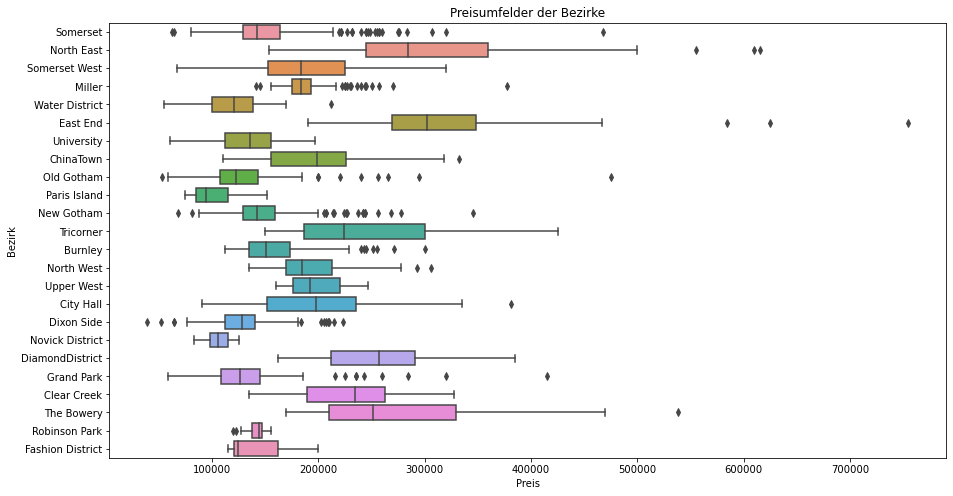

In [9]:
dataset['Bezirk'] = dataset['Bezirk'].replace('Somerst', 'Somerset')

plt.figure(figsize = (15,8))
sb.boxplot(data = dataset, x = 'Preis', y = 'Bezirk').set_title("Preisumfelder der Bezirke")
plt.show()

In [10]:
pd.get_dummies(dataset['Bezirk']).replace(0, math.nan).mul(dataset['Preis'], axis = 0).quantile([.25,.5,.75])

,Burnley,ChinaTown,City Hall,Clear Creek,DiamondDistrict,Dixon Side,East End,Fashion District,Grand Park,Miller,...,Old Gotham,Paris Island,Robinson Park,Somerset,Somerset West,The Bowery,Tricorner,University,Upper West,Water District
0.25,134750.0,155900.0,151250.0,189375.0,211625.0,112250.0,269342.5,121000.0,108000.0,174750.0,...,107700.0,85000.0,137800.0,129000.0,153000.0,209750.0,186625.00,112000.0,175900.0,100000.0
0.50,150900.0,198500.0,198000.0,234250.0,257500.0,128000.0,301750.0,124000.0,126300.0,183750.0,...,123000.0,93900.0,143875.0,142000.0,184000.0,251000.0,224000.00,135900.0,192500.0,120500.0
0.75,173000.0,226001.0,235250.0,262500.0,291000.0,140525.0,348500.0,162500.0,145125.0,193375.0,...,143000.0,115000.0,147000.0,164000.0,225000.0,329500.0,300313.25,155000.0,219990.0,139000.0


### Erkenntnis
Als Orientierung für das Budget der Investierenden kann die oben gezeigte Tabelle zu Rate gezogen werden.  
Das 0.25 Quartil sollte als Mindest-Budget und das 0.75 Quartil als obere Budgetgrenze gelten.

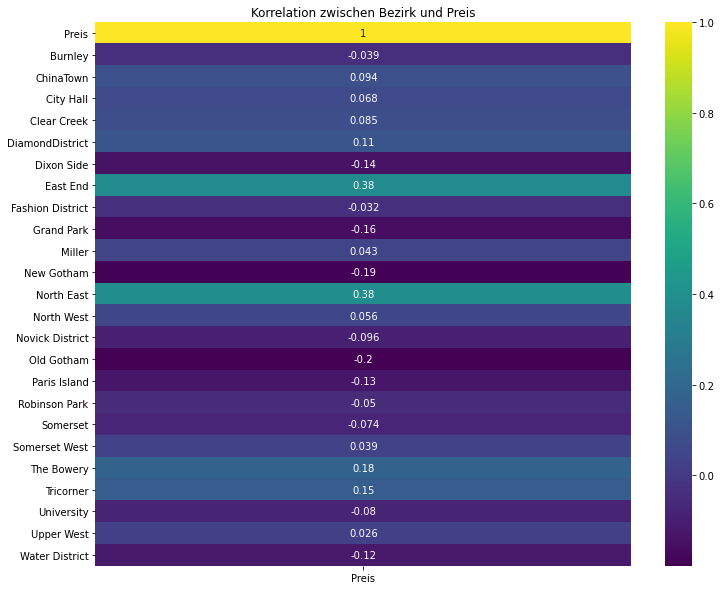

In [11]:
encoded_bezirke = pd.get_dummies(dataset['Bezirk'])
bezirk_preis = dataset[['Preis']].join(encoded_bezirke)
plt.figure(figsize = (12, 10))
sb.heatmap(data = bezirk_preis.corr()['Preis'].to_frame(), annot = True, cmap = 'viridis').set_title('Korrelation zwischen Bezirk und Preis')
plt.show()

### Erkenntnis
Durch diese Heatmap lässt sich erkennen, wie die Auswahl eines Bezirkes eine Auswirkung auf den Preis einer Immobilie hat.  
Beispielsweise besitzen die Bezirke 'North East' und 'East End' mit einem Korrelationswert von +0,38 einen hohen positiven Einfluss auf dem Preis, d.h. Immobilien dort sind teurer als Beispielsweise in dem Bezirk 'Old Gotham' mit einem Korrelationswert von -0,2.

## Summary
### Was muss renoviert werden um den Verkaufspreis der Immobilie zu maximieren?
Renovierungsmöglichkeiten die den Preis sinnvoll beeinflussen sind:
#### Küchen
Eine erhöhung der Küchenqualität hat eine positive Auswirkung auf den Preis.
#### Wohnfläche
Wenn möglich kann eine Wohnflächenerweiterung in Erwägung gezogen werden. Ist dies nicht möglich hat eine Erhöhung der Raumanzahl bereits eine positive Auswirkung auf den Preis.
#### Garage
Ein Ausbau/eine Erweiterung der Garage auf eine höhere Garagenkapazität ist eine weitere Renovierungsmöglichkeit die genutzt werden kann um den Verkaufspreis zu maximieren.
  
  
  
### Mit welchem Budget sollte in welches Gebiet investiert werden?
Die Investoren können sich zu dieser Frage an der obenstehenden [Tabelle und Boxplots](#In-welchem-Preisumfeld-liegt-welcher-Bezirk?) orientieren. In der Tabelle werden empfohlene Ober- und Untergrenzen für das Budget je Bezirk aufgezeigt.


### Welche Hausattribute haben einen ausschlaggebenden Einfluss auf den Preis?
Hausattribute die einen stärkeren Einfluss auf den Preis besitzen sind:
- Grundstücksgröße
- Baujahr
- Renovierungsjahr
- Wohnfläche (1. Stock + 2. Stock)
- Kellerfläche
- Küchenqualität
- Räume
- Garagenkapazität
- Haustyp
- Grundstücksform (IR1 > IR2 > IR3 > Reg)
- Garagentyp (Anbau > Eingebaut > ... > Freistehend)
- Bezirk der Immobilie

### Welches ist der beste Verkaufsmonat einer Immobilie?
Es hat sich gezeigt, dass der Verkaufsmonat keinen Einfluss auf den Verkaufspreis einer Immobilie besitzt. 

# Aufgabe 3: Data Preparation und Modeling 

In [12]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [13]:
random_seed = 123456789 # Random Seed für Modelle

In [14]:
dataset = pd.read_csv('./DatenAusgegeben1.0.csv', delimiter=';', encoding = 'cp852')
dataset

,Grundstück in qm,Grundstücksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,...,Schlafzimmer,Küchen,Küchenqualitt,Rume,Garage Typ,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,...,6,2,3,10,Anbau,2,NaN,8,2136,156500
1,1326,Reg,Nein,North East,RL,Norm,1Fam,5,2133,2133,...,3,1,4,7,Anbau,3,NaN,1,2137,350000
2,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,...,3,1,4,5,Freistehend,1,NaN,6,2140,137900
3,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,...,3,1,4,8,Anbau,2,NaN,4,2136,184000
4,697,Reg,Nein,Miller,RL,Norm,1Fam,5,2129,2129,...,3,1,4,7,Anbau,2,NaN,6,2140,189000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1272,IR1,Nein,North East,RL,Norm,1Fam,5,2133,2134,...,3,1,5,10,Eingebaut,3,NaN,3,2138,412500
1996,941,IR1,Nein,Miller,RL,Norm,1Fam,5,2134,2134,...,3,1,4,7,Anbau,2,NaN,7,2139,195500
1997,1093,Reg,Nein,Grand Park,RL,Norm,1Fam,7,2040,2130,...,2,1,3,6,Freistehend,1,NaN,5,2137,112000
1998,1228,IR1,Nein,North East,RL,Norm,1Fam,5,2134,2134,...,3,1,4,9,Eingebaut,3,NaN,2,2136,279000


## Unnötige Spalten entfernen
Zu entfernen sind:  
Siehe Aufg. 2. Untersuchung auf einen Zusammenhang zwischen Preis und Verkaufszeitpunkt:
- Verkaufsjahr
- Verkaufsmonat

(Da Gesamtwohnfläche zusammengesetzt aus erster Stock und zweiter Stock ist:
- Erster Stock in qm
- Zweiter Stock in qm
#TODO: Prüfen ob nicht rauszunehmen)

Siehe Aufg. 2. Untersuchung des Datensatzes auf vernachlässigbare Hauseigenschaften (Spalten):
- Pool
- Küchen
- Klimaanlage
- Heizung

In [15]:
df_keinunnoetig = dataset.drop(['Verkaufsjahr', 'Verkaufsmonat', 'Erster Stock in qm', 'Zweiter Stock in qm', 'Pool', 'Küchen', 'Klimaanlage', 'Heizung'], axis = 1)

## Anomalien bereinigen
Nun sollen Anomalien in dem Datensatz gefunden und bereinigt werden.
Hierbei wird der Interquartilsabstand verwendet um Ausreißer zu finden.  
(https://en.wikipedia.org/wiki/Interquartile_range)  

Hierbei sollen ausschließlich numerische Werte, also keine Werte einer ordinalen Skala betrachtet werden. (`columns_filtered`)

Bereits in Aufgabe 2 erkannte und zu bereinigende Anomalien sind:
- Bezirksname `Somerst` anstatt `Somerset`
- Ausreißer im Datensatz

In [16]:
df_keinunnoetig['Bezirk'] = df_keinunnoetig['Bezirk'].replace('Somerst', 'Somerset') # Bezirksname korrigieren

columns = ['Grundstück in qm', 'Zustand', 'Gebaut',
           'Renoviert', 'Zustand Fassade', 'Kellerflche in qm',
           'Wohnflche in qm', 'Schlafzimmer', 'Küchenqualitt', 
           'Rume', 'Garagenkapazitt', 'Preis']

columns_filtered = ['Grundstück in qm', 'Kellerflche in qm', 'Wohnflche in qm', 
           'Schlafzimmer', 'Gebaut', 'Rume', 'Garagenkapazitt', 'Preis']

Q1 = df_keinunnoetig[columns_filtered].quantile(0.25)
Q3 = df_keinunnoetig[columns_filtered].quantile(0.75)
IQR = Q3 - Q1 # Interquartilsabstand berechnen

df_anomalienbereinigen = df_keinunnoetig[~((df_keinunnoetig[columns_filtered] < (Q1 - 1.5 * IQR)) | (dataset[columns_filtered] > (Q3 + 1.5 * IQR))).any(axis=1)] # Anomalien außerhalb des Interquartilsabstands entfernen

## Verifikation der Bereinigung
Nun soll verifiziert werden, ob die Bereinigung auf Anomalien erfolgreich gewesen ist. Hierzu können die untenstehenden Boxplots mit denen aus **Aufg. 2, Finden von Anomalien** verglichen werden.

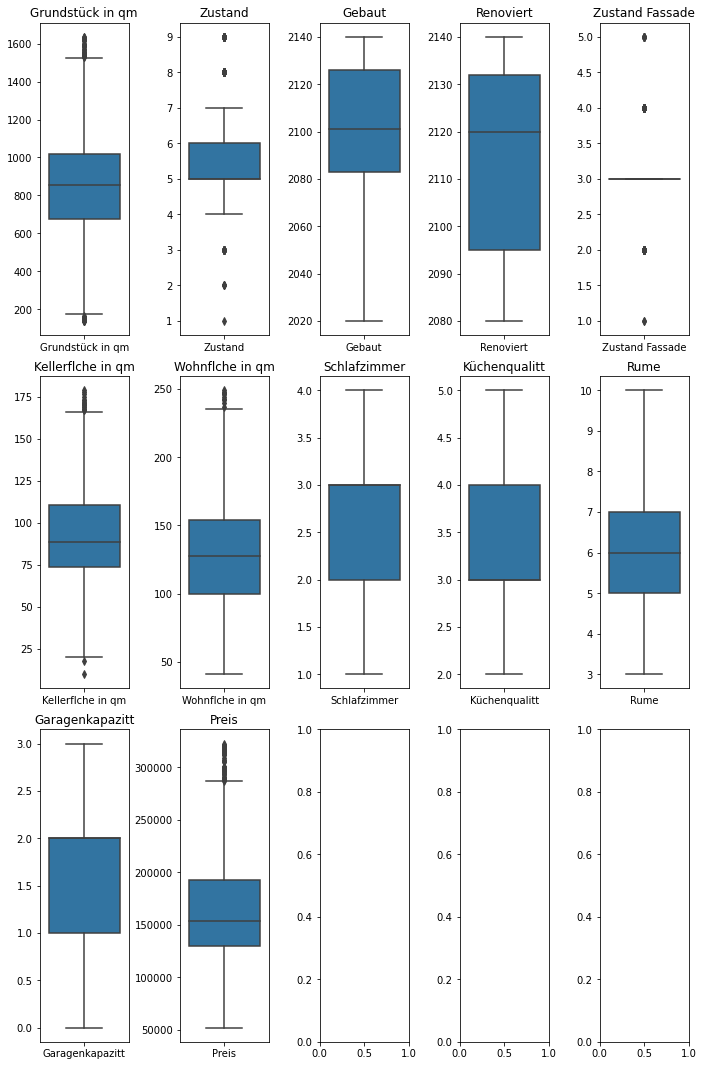

In [17]:
fig, axes = plt.subplots(3, 5, figsize = (10, 15))
i = 0
plt.tight_layout(pad = 2)
for column in columns:
  chosenax = axes[math.floor(i / 5)][i % 5]
  chosenax.set_title(column)
  sb.boxplot(data = df_anomalienbereinigen[[column]], ax = chosenax)
  i = i + 1
plt.show()

## Feature Engineering
Folgend soll das One-Hot Encoding auf alle geeigneten Kategorien angewendet werden.

Den Bezirken ist ein weiterer Bezirk, `Finger River` hinzuzufügen, welcher in der Datenbeschreibung, jedoch nicht im Datensatz vorhanden ist.

In [18]:
encode_kategorien = ['Bezirk', 'Lage', 'Heizungsqualitt', 'Typ', 'Steigung', 'Grundstücksform', 'Garage Typ', 'Zone']

encoded_kategorieeigenschaften = pd.get_dummies(dataset[encode_kategorien].fillna('Keine'))
encoded_kategorieeigenschaften['Bezirk_Finger River'] = 0
df_encoded = df_anomalienbereinigen.drop(encode_kategorien, axis = 1).join(encoded_kategorieeigenschaften)

print(df_encoded)

      Grundstück in qm  Zustand  Gebaut  Renoviert  Zustand Fassade  \
2                  725        7    2096       2138                3   
3                  725        5    2135       2135                3   
4                  697        5    2129       2129                3   
5                 1274        5    2080       2080                3   
7                  211        5    2133       2134                3   
...                ...      ...     ...        ...              ...   
1994               948        8    2070       2127                3   
1996               941        5    2134       2134                3   
1997              1093        7    2040       2130                3   
1998              1228        5    2134       2134                3   
1999               778        7    2071       2103                3   

      Kellerflche in qm  Wohnflche in qm  Schlafzimmer  Küchenqualitt  Rume  \
2                    80               83             3              

## Aufspaltung nach Trainings- und Validierungsset

In [19]:
df_train = df_encoded.drop('Preis', axis = 1)
values_predict = df_encoded['Preis']
x_train, x_test, y_train, y_test = train_test_split(df_train, values_predict, test_size = 0.2, random_state = random_seed)

## Lineare Regression

In [20]:
reg1 = LinearRegression()
reg1.fit(x_train, y_train)

LinearRegression()

## Random Forest
Finden von optimalen Parametern mithilfe von Gridsearch und 5-fold Crossvalidation

In [21]:
RFR=RandomForestRegressor(random_state = random_seed)

search_grid_rfr = {'n_estimators': [100,200,300,400,500,1000], 'max_features': ['auto', 'sqrt']}

search = GridSearchCV(estimator = RFR, param_grid = search_grid_rfr, n_jobs = -1, cv = 5, verbose = 8)

search.fit(x_train, y_train)
print("Bestes gefundenes Modell:", search.best_estimator_)
print("Bester CV Score:", search.best_score_)
reg2 = search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:   17.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:   20.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   22.7s finished
Bestes gefundenes Modell: RandomForestRegressor(n_estimators=400, random_state=123456789)
Bester CV Score: 0.8748802872413766


## Gradient Boosting
Ebenso finden von optimalen Parametern mithilfe von Gridsearch und 5-fold Crossvalidation

In [22]:
GBR=GradientBoostingRegressor(random_state = random_seed)

search_grid_gbr = {'n_estimators':[100,500,1000], 'learning_rate':[0.01,0.05,.1], 'max_depth':[2,3,4,5]}

search=GridSearchCV(estimator = GBR, param_grid = search_grid_gbr, n_jobs = -1, cv = 5, verbose = 8)

search.fit(x_train, y_train)
print("Bestes gefundenes Modell:", search.best_estimator_)
print("Bester CV Score:", search.best_score_)
reg3 = search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   33.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   33.1s finished
Bestes gefundenes Modell: GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=1000,
                          random_state=123456789)
Bester CV Score: 0.8956231722043929


## Vergleichen der Modelle (R^2)
Folgend werden die Modelle anhand der R^2 Metrik verglichen.  
Hierbei wird sowohl die R^2 Metrik der Anwendung des Modells auf den Trainings-Datensatz, als auch die R^2 Metrik bei einer Anwendung auf den Test-Datensatz verglichen. Durch diesen Vergleich soll eventuelles Over-/Underfitting erkannt werden.

In [23]:
print("Modell\t\t\t\t","Training","\t\t","Test")
print("Linear Regression\t\t", reg1.score(x_train, y_train), "\t", reg1.score(x_test, y_test))
print("Random Forest Regression\t", reg2.score(x_train, y_train), "\t", reg2.score(x_test, y_test))
print("Gradient Boosting Regression\t", reg3.score(x_train, y_train), "\t", reg3.score(x_test, y_test))

Modell				 Training 		 Test
Linear Regression		 0.8946771744808966 	 0.8920920539619288
Random Forest Regression	 0.9835364932952899 	 0.8870579855044514
Gradient Boosting Regression	 0.9496137120559751 	 0.903655330979769


### Erkenntnis
Wie in der obigen Ausgabe zu sehen overfittet lediglich die `Random Forest Regression`.  
Alle drei Modelle erzielen dennoch eine gute Performance.

## Visueller Vergleich der Modelle
Um die Modelle visuell zu vergleichen wird folgend zunächst der Testdatensatz zusammen mit den vorhergesagten Preisen aufsteigend sortiert um eine bessere Visualisierung zu ermöglichen. Daraufhin werden die Regressionsmodelle visuell verglichen. 

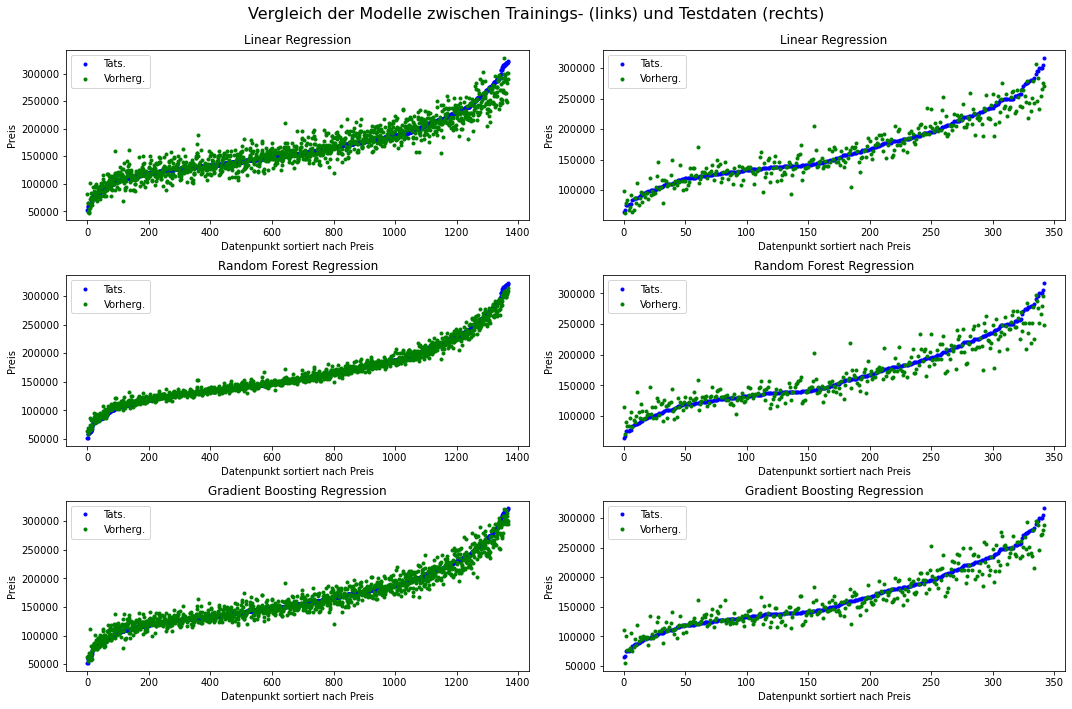

In [24]:

plt.figure(figsize = (15, 10))

i = 1
for reg in [(reg1, 'Linear Regression'), (reg2, 'Random Forest Regression'), (reg3, 'Gradient Boosting Regression')]:
    y_pred = reg[0].predict(x_test)
    y_test_sort, y_pred_sort = zip(*sorted(zip(y_test, y_pred))) ## Synchrones aufsteigendes sortieren nach Preis
    plt.subplot(3,2,i * 2)
    i = i + 1
    plt.plot(range(0, len(y_test_sort)), y_test_sort, 'b.', label = 'Tats.')
    plt.plot(range(0, len(y_pred_sort)), y_pred_sort, 'g.', label = 'Vorherg.')
    plt.xlabel('Datenpunkt sortiert nach Preis')
    plt.ylabel('Preis')
    plt.legend(loc = 'upper left')
    plt.title(reg[1])

i = 1
for reg in [(reg1, 'Linear Regression'), (reg2, 'Random Forest Regression'), (reg3, 'Gradient Boosting Regression')]:
    y_pred = reg[0].predict(x_train)
    y_test_sort, y_pred_sort = zip(*sorted(zip(y_train, y_pred))) ## Synchrones aufsteigendes sortieren nach Preis
    plt.subplot(3,2,i * 2 - 1)
    i = i + 1
    plt.plot(range(0, len(y_test_sort)), y_test_sort, 'b.', label = 'Tats.')
    plt.plot(range(0, len(y_pred_sort)), y_pred_sort, 'g.', label = 'Vorherg.')
    plt.xlabel('Datenpunkt sortiert nach Preis')
    plt.ylabel('Preis')
    plt.legend(loc = 'upper left')
    plt.title(reg[1])

plt.suptitle("Vergleich der Modelle zwischen Trainings- (links) und Testdaten (rechts)", fontsize = 16)
plt.tight_layout()
plt.subplots_adjust(top = 0.92)
plt.show()

### Erkenntnis
Aus den oben gezeigten Plots und dem Vergleich der R^2 Metrik zeigt sich, dass alle drei Modelle sehr genau in der Vorhersage arbeiten, jedoch die `Gradient Boosting Regression` wie erwartet, da zum jetzigen Zeitpunkt State of the Art, die besten Ergebnisse liefert. Zudem zeigt sich, dass sich die `Random Forest Regression` sehr stark an den Trainingsdatensatz angleicht.

Daher wählen wir als finales Modell die `Gradient Boosting Regression`.

## Erklärung und Interpretation der Linearen Regression

In [25]:
print("Y-Achsenabschnitt:", reg1.intercept_)
print("\nKoeffizienten:")
for i in range(0, len(reg1.coef_)):
    print(x_train.columns[i] + ":", reg1.coef_[i])

Y-Achsenabschnitt: -1198126.9030308886

Koeffizienten:
Grundstück in qm: 16.50733045055129
Zustand: 7027.106335198403
Gebaut: 461.35790117311774
Renoviert: 85.53833599633754
Zustand Fassade: -203.3624886956286
Kellerflche in qm: 329.2765853721718
Wohnflche in qm: 617.6738199853504
Schlafzimmer: -4499.75812830541
Küchenqualitt: 8327.512500988822
Rume: -437.53171257183385
Garagenkapazitt: 10748.804447234743
Bezirk_Burnley: -12101.720965937337
Bezirk_ChinaTown: -5991.446024807879
Bezirk_City Hall: 16882.884751118338
Bezirk_Clear Creek: -2553.0188389378436
Bezirk_DiamondDistrict: 14622.89748453641
Bezirk_Dixon Side: 2653.4973039852575
Bezirk_East End: 19909.53393564159
Bezirk_Fashion District: 13633.657669387405
Bezirk_Grand Park: -14977.510581714065
Bezirk_Miller: -9598.722690894023
Bezirk_New Gotham: -12514.609155523069
Bezirk_North East: 17059.708219936918
Bezirk_North West: -13383.387028768182
Bezirk_Novick District: 9065.47240172433
Bezirk_Old Gotham: -7041.862683584944
Bezirk_Paris I

### Erklärung
Der Grundwert einer Immobilie beträgt etwa -1,2 Millionen Gotham Dollars.  
Hierzu werden nun den Eigenschaften und Größen zugeordnete Gotham Dollar Einheiten dazuaddiert.
   
Beispiel:
- Grundstück: 500qm
- Zustand: 6
- Gebaut: Jahr 2080
- Renoviert: Jahr 2100
- Wohnfläche: 80 qm
- Bezirk: China Town
- ...

Beispielrechnung:  
`-1.198.127 + (500 * 17) + (6 * 7027) + (2080 * 461) + (2100 * 86) + (80 * 618) + (1 * (-5991)) + ... = ...`

So addiert sich dies zusammen bis man den finalen Immobilienpreis erhält.

## Export des Gradient Boosting Modells

In [26]:
from joblib import dump
dump(reg3, 'gradientboosted.model')

['gradientboosted.model']

# Aufgabe 4: Evaluation

In [27]:
# Imports
import pandas as pd

## Import und Verarbeitung des Modells

In [28]:
from joblib import load
reg = load('gradientboosted.model')

In [29]:
dataset = pd.read_csv('./DatenAusgegeben1.0.csv', delimiter=';', encoding = 'cp852')

In [30]:
df_keinunnoetig = dataset.drop(['Verkaufsjahr', 'Verkaufsmonat', 'Erster Stock in qm', 'Zweiter Stock in qm', 'Pool', 'Küchen', 'Klimaanlage', 'Heizung', 'Preis'], axis = 1)
encode_kategorien = ['Bezirk', 'Lage', 'Heizungsqualitt', 'Typ', 'Steigung', 'Grundstücksform', 'Garage Typ', 'Zone']
encoded_kategorieeigenschaften = pd.get_dummies(dataset[encode_kategorien].fillna('Keine'))
df_encoded = df_keinunnoetig.drop(encode_kategorien, axis = 1).join(encoded_kategorieeigenschaften)

needed_columns = ['Grundstück in qm', 'Zustand', 'Gebaut', 'Renoviert', 'Zustand Fassade',
       'Kellerflche in qm', 'Wohnflche in qm', 'Schlafzimmer', 'Küchenqualitt',
       'Rume', 'Garagenkapazitt', 'Bezirk_Burnley', 'Bezirk_ChinaTown',
       'Bezirk_City Hall', 'Bezirk_Clear Creek', 'Bezirk_DiamondDistrict',
       'Bezirk_Dixon Side', 'Bezirk_East End', 'Bezirk_Fashion District',
       'Bezirk_Grand Park', 'Bezirk_Miller', 'Bezirk_New Gotham',
       'Bezirk_North East', 'Bezirk_North West', 'Bezirk_Novick District',
       'Bezirk_Old Gotham', 'Bezirk_Paris Island', 'Bezirk_Robinson Park',
       'Bezirk_Somerset', 'Bezirk_Somerset West', 'Bezirk_Somerst',
       'Bezirk_The Bowery', 'Bezirk_Tricorner', 'Bezirk_University',
       'Bezirk_Upper West', 'Bezirk_Water District', 'Lage_Bahn', 'Lage_Norm',
       'Lage_Pos', 'Lage_Str', 'Heizungsqualitt_Ex', 'Heizungsqualitt_Gut',
       'Heizungsqualitt_Schl', 'Heizungsqualitt_Ty', 'Heizungsqualitt_Ud',
       'Typ_1Fam', 'Typ_2Fam', 'Typ_2FamAn', 'Typ_REH', 'Typ_RMH',
       'Steigung_Ja', 'Steigung_Nein', 'Grundstücksform_IR1',
       'Grundstücksform_IR2', 'Grundstücksform_IR3', 'Grundstücksform_Reg',
       'Garage Typ_2Typen', 'Garage Typ_Anbau', 'Garage Typ_CarPort',
       'Garage Typ_Eingebaut', 'Garage Typ_Freistehend', 'Garage Typ_Keine',
       'Garage Typ_TG', 'Zone_RH', 'Zone_RL', 'Zone_RM',
       'Bezirk_Finger River']

print("Fehlende Eigenschaften:",set(needed_columns).difference(set(df_encoded.columns)))
print("Eigenschaften werden jetzt angefügt..")

for column in needed_columns:
    if column not in df_encoded:
        df_encoded[column] = 0

df_encoded = df_encoded.reindex(columns = needed_columns)

Fehlende Eigenschaften: {'Bezirk_Finger River'}
Eigenschaften werden jetzt angefügt..


In [31]:
y_pred = reg.predict(df_encoded)

In [32]:
dataset['Vorhergesagter Preis'] = y_pred

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, max_error
import numpy as np

def mape (y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Metriken des finalen Modells

In [34]:
y_true = dataset['Preis']
print("R^2:", r2_score(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", mean_squared_error(y_true, y_pred)**.5)
print("MAPE:", mape(y_true, y_pred))
print("MAX:", max_error(y_true, y_pred))

R^2: 0.8617830770312022
MSE: 717360486.6083843
RMSE: 26783.58614167237
MAPE: 7.064173118418193
MAX: 398920.5934162472


## Evaluation der Vorhersage
Die Metriken zeigen uns, dass das in der Modeling Phase erstellte Modell gut geeignet ist, eine Preisvorhersage wie in der Phase des Business Understandings definiert durchzuführen.  

Hohe Werte des MAX-Error und des MSE/RMSE sind auf Ausreißer im durchlaufenen Datensatz zurückzuführen.  



## Evaluation der anderen Ziele
In der Data Exploration und Analyse wurde versucht die anderen Ziele, die Frage nach Renovierungsmöglichkeiten,  die Frage mit welchem Budget in welchen Bezirk investiert werden sollte, die Frage welche Hausattribute einen ausschlaggebenden Einfluss auf den Preis besitzen und die Frage nach dem profitabelsten Verkaufsmonat einer Immobilie zu beantworten.

Es konnten alle Fragen, außer der nach dem profitabelsten Verkaufsmonat in der Data Exploration und Analyse beantwortet werden. Zu dieser Frage konnte keine Antwort gefunden werden, da es sich herausstellte, dass der Verkaufsmonat in diesem Datensatz keinen Einfluss auf den Verkaufspreis einer Immobilie besitzt.

# Standalone Prediction

In [35]:
# Imports
import pandas as pd

## Import des Modells

In [36]:
from joblib import load
reg = load('gradientboosted.model')

## Import der Daten
Hier bitte entweder über den Input-Dialog, oder direkt, den Dateinamen des einzulesenden Datensatzes eingeben.

In [37]:
filename = input("Bitte Dateiname des einzulesenden Datensatzes eingeben:") or "DatenTest.csv"

In [38]:
dataset = pd.read_csv(filename, delimiter=';', encoding = 'cp852')
dataset

,Grundstück in qm,Grundstücksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,...,Schlafzimmer,Küchen,Küchenqualitt,Rume,Garage Typ,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,...,6,2,3,10,Anbau,2,NaN,8,2136,156500
1,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,...,3,1,4,5,Freistehend,1,NaN,6,2140,137900
2,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,...,3,1,4,8,Anbau,2,NaN,4,2136,184000
3,211,Reg,Nein,North East,RL,Norm,RMH,5,2133,2134,...,2,1,4,6,Eingebaut,2,NaN,7,2139,173000
4,557,Reg,Nein,University,RL,Norm,1Fam,5,2056,2080,...,4,1,3,7,NaN,0,NaN,6,2136,102000
5,799,Reg,Ja,Water District,RM,Norm,1Fam,6,2067,2080,...,3,1,3,7,Freistehend,1,NaN,6,2136,119500


## Vorbereitung der Daten
Siehe auch Aufgabe 3
1. Entfernung unnötiger Spalten
2. One-Hot Encoding
3. Entfernen encodeter ursprünglicher Spalten
4. Auffüllen mit fehlenden One-Hot Encoding Spalten
5. Sortieren der Spalten um Modell zu entsprechen

In [39]:
df_keinunnoetig = dataset.drop(['Verkaufsjahr', 'Verkaufsmonat', 'Erster Stock in qm', 'Zweiter Stock in qm', 'Pool', 'Küchen', 'Klimaanlage', 'Heizung', 'Preis', 'Vorhergesagter Preis'], axis = 1, errors = 'ignore') ## errors = 'ignore' um nicht vorhandene Spalten einfach zu übergehen
encode_kategorien = ['Bezirk', 'Lage', 'Heizungsqualitt', 'Typ', 'Steigung', 'Grundstücksform', 'Garage Typ', 'Zone']
encoded_kategorieeigenschaften = pd.get_dummies(dataset[encode_kategorien].fillna('Keine'))
df_encoded = df_keinunnoetig.drop(encode_kategorien, axis = 1).join(encoded_kategorieeigenschaften)

needed_columns = ['Grundstück in qm', 'Zustand', 'Gebaut', 'Renoviert', 'Zustand Fassade',
       'Kellerflche in qm', 'Wohnflche in qm', 'Schlafzimmer', 'Küchenqualitt',
       'Rume', 'Garagenkapazitt', 'Bezirk_Burnley', 'Bezirk_ChinaTown',
       'Bezirk_City Hall', 'Bezirk_Clear Creek', 'Bezirk_DiamondDistrict',
       'Bezirk_Dixon Side', 'Bezirk_East End', 'Bezirk_Fashion District',
       'Bezirk_Grand Park', 'Bezirk_Miller', 'Bezirk_New Gotham',
       'Bezirk_North East', 'Bezirk_North West', 'Bezirk_Novick District',
       'Bezirk_Old Gotham', 'Bezirk_Paris Island', 'Bezirk_Robinson Park',
       'Bezirk_Somerset', 'Bezirk_Somerset West', 'Bezirk_Somerst',
       'Bezirk_The Bowery', 'Bezirk_Tricorner', 'Bezirk_University',
       'Bezirk_Upper West', 'Bezirk_Water District', 'Lage_Bahn', 'Lage_Norm',
       'Lage_Pos', 'Lage_Str', 'Heizungsqualitt_Ex', 'Heizungsqualitt_Gut',
       'Heizungsqualitt_Schl', 'Heizungsqualitt_Ty', 'Heizungsqualitt_Ud',
       'Typ_1Fam', 'Typ_2Fam', 'Typ_2FamAn', 'Typ_REH', 'Typ_RMH',
       'Steigung_Ja', 'Steigung_Nein', 'Grundstücksform_IR1',
       'Grundstücksform_IR2', 'Grundstücksform_IR3', 'Grundstücksform_Reg',
       'Garage Typ_2Typen', 'Garage Typ_Anbau', 'Garage Typ_CarPort',
       'Garage Typ_Eingebaut', 'Garage Typ_Freistehend', 'Garage Typ_Keine',
       'Garage Typ_TG', 'Zone_RH', 'Zone_RL', 'Zone_RM',
       'Bezirk_Finger River']

print("Fehlende Eigenschaften:",set(needed_columns).difference(set(df_encoded.columns)))
print("Eigenschaften werden jetzt angefügt..")

for column in needed_columns:
    if column not in df_encoded:
        df_encoded[column] = 0

df_encoded = df_encoded.reindex(columns = needed_columns)

Fehlende Eigenschaften: {'Bezirk_The Bowery', 'Bezirk_Robinson Park', 'Lage_Str', 'Bezirk_Grand Park', 'Bezirk_Miller', 'Bezirk_Clear Creek', 'Bezirk_New Gotham', 'Bezirk_City Hall', 'Bezirk_ChinaTown', 'Bezirk_Fashion District', 'Bezirk_Somerst', 'Heizungsqualitt_Ud', 'Lage_Bahn', 'Bezirk_Upper West', 'Bezirk_Old Gotham', 'Bezirk_Tricorner', 'Bezirk_Burnley', 'Lage_Pos', 'Bezirk_Novick District', 'Bezirk_North West', 'Grundstücksform_IR3', 'Garage Typ_CarPort', 'Heizungsqualitt_Schl', 'Garage Typ_TG', 'Typ_REH', 'Bezirk_Paris Island', 'Bezirk_Finger River', 'Bezirk_DiamondDistrict', 'Bezirk_East End', 'Grundstücksform_IR2', 'Heizungsqualitt_Gut', 'Typ_2FamAn', 'Bezirk_Dixon Side', 'Garage Typ_2Typen', 'Zone_RH'}
Eigenschaften werden jetzt angefügt..


## Prediction

In [40]:
y_pred = reg.predict(df_encoded)

In [41]:
dataset['Vorhergesagter Preis'] = y_pred

In [42]:
dataset

,Grundstück in qm,Grundstücksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,...,Küchen,Küchenqualitt,Rume,Garage Typ,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis,Vorhergesagter Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,...,2,3,10,Anbau,2,NaN,8,2136,156500,178125.430501
1,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,...,1,4,5,Freistehend,1,NaN,6,2140,137900,132763.958362
2,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,...,1,4,8,Anbau,2,NaN,4,2136,184000,184172.291638
3,211,Reg,Nein,North East,RL,Norm,RMH,5,2133,2134,...,1,4,6,Eingebaut,2,NaN,7,2139,173000,169755.797613
4,557,Reg,Nein,University,RL,Norm,1Fam,5,2056,2080,...,1,3,7,NaN,0,NaN,6,2136,102000,123539.988866
5,799,Reg,Ja,Water District,RM,Norm,1Fam,6,2067,2080,...,1,3,7,Freistehend,1,NaN,6,2136,119500,119955.047592


In [43]:
filename = input("Bitte Name der Ausgabedatei eingeben:") or "VorhersageAusgabe.csv"

In [44]:
if filename:
    dataset.to_csv(filename, sep = ';')

## Metriken berechnen
Folgend sollen folgende Metriken für den eingelesenen Datensatz berechnet werden:  
R2, MSE, RMSE, MAPE, MAX.

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, max_error
import numpy as np

def mape (y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [46]:
y_true = dataset['Preis'].fillna(0)
print("R^2:", r2_score(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", mean_squared_error(y_true, y_pred)**.5)
print("MAPE:", mape(y_true, y_pred))
print("MAX:", max_error(y_true, y_pred))

R^2: 0.8056826254276921
MSE: 161461815.0402826
RMSE: 12706.762571177704
MAPE: 6.83499366828869
MAX: 21625.43050082709
